In [41]:
#importing necessary packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings as w

w.filterwarnings('ignore')
pd.set_option('display.max_columns', None)

In [42]:
# data loading
url = 'https://www.kaggle.com/datasets/lava18/google-play-store-apps?select=googleplaystore.csv'
df = pd.read_csv('/content/googleplaystore.csv')
df.sample(7)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
412,Firefox Browser fast & private,COMMUNICATION,4.4,3075118,Varies with device,"100,000,000+",Free,0,Everyone,Communication,"July 10, 2018",Varies with device,Varies with device
4951,tTorrent - ad free,VIDEO_PLAYERS,4.3,2976,Varies with device,"10,000+",Paid,$1.99,Everyone,Video Players & Editors,"June 15, 2018",1.5.14,4.1 and up
6048,BD Internet Package Activator,NEWS_AND_MAGAZINES,4.9,13,2.3M,100+,Free,0,Everyone,News & Magazines,"March 9, 2018",1.2,4.0.3 and up
8749,Monster Fishing 2018,SPORTS,4.4,32881,76M,"1,000,000+",Free,0,Everyone,Sports,"August 7, 2018",0.0.80,4.1 and up
5777,F05WatchFace for Android Wear,PRODUCTIVITY,3.9,127,5.9M,"1,000+",Paid,$0.99,Everyone,Productivity,"December 24, 2017",7.0.1,4.3 and up
1370,"Zombies, Run! 5k Training (Free)",HEALTH_AND_FITNESS,4.0,267,Varies with device,"50,000+",Free,0,Teen,Health & Fitness,"August 1, 2018",Varies with device,Varies with device
7109,CB Outdoors,FAMILY,3.8,5,12M,"1,000+",Free,0,Everyone,Education,"May 30, 2017",1.200,4.0.3 and up


In [43]:
# verification of total records

display(f'Total Features in the dataset are {df.shape[1]}')
display(f'Total Records in the dataset are {df.shape[0]}')

'Total Features in the dataset are 13'

'Total Records in the dataset are 10841'

In [44]:
# describing columns in the dataset
display(df.columns.to_list())

['App',
 'Category',
 'Rating',
 'Reviews',
 'Size',
 'Installs',
 'Type',
 'Price',
 'Content Rating',
 'Genres',
 'Last Updated',
 'Current Ver',
 'Android Ver']

In [45]:
# giving all datatypes of the columns
display(df.dtypes)

,0
App,object
Category,object
Rating,float64
Reviews,object
Size,object
Installs,object
Type,object
Price,object
Content Rating,object
Genres,object


In [46]:
#checking for unique values present
display(df.nunique())

,0
App,9660
Category,34
Rating,40
Reviews,6002
Size,462
Installs,22
Type,3
Price,93
Content Rating,6
Genres,120


<Axes: ylabel='Density'>

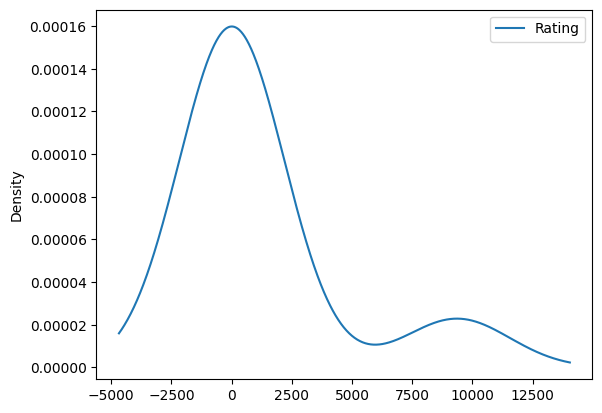

In [47]:
#describing the columns present
display(df.describe(include='all').plot(kind='kde'))

In [48]:
display(df.describe(include='all').T)

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
App,10841,9660,ROBLOX,9,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Category,10841,34,FAMILY,1972,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Rating,9367.0,NaN,NaN,NaN,4.193338,0.537431,1.0,4.0,4.3,4.5,19.0
Reviews,10841,6002,0,596,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Size,10841,462,Varies with device,1695,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Installs,10841,22,"1,000,000+",1579,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Type,10840,3,Free,10039,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Price,10841,93,0,10040,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Content Rating,10840,6,Everyone,8714,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Genres,10841,120,Tools,842,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [49]:
# checking information about all features
display(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


None

**DATA CLEANING**

In [50]:
# checking for duplicated values
print(df.duplicated().sum())

483


In [51]:
#dropping all duplicates
print(df.drop_duplicates(inplace=True))
print(df.duplicated().sum())

None
0


In [52]:
# checking for null values
display(df.isnull().sum())

,0
App,0
Category,0
Rating,1465
Reviews,0
Size,0
Installs,0
Type,1
Price,0
Content Rating,1
Genres,0


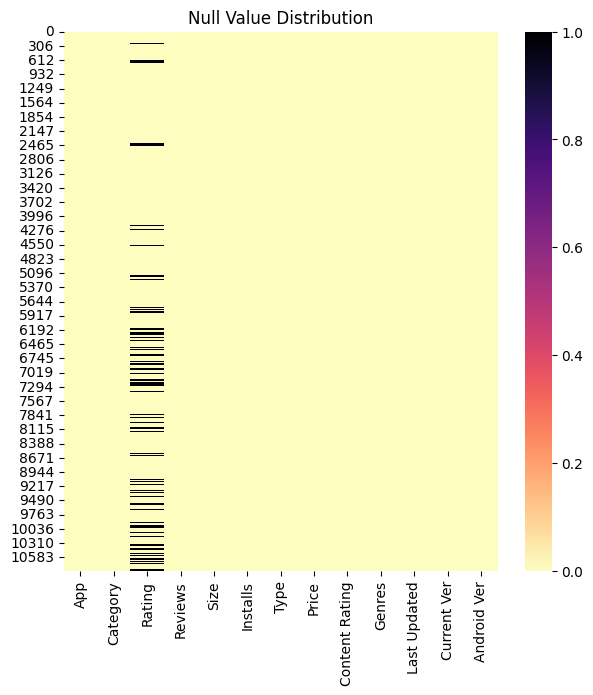

In [53]:
# Plotting null values
plt.figure(figsize=(7,7))
sns.heatmap(df.isnull(), cbar=True, cmap='magma_r')
plt.title('Null Value Distribution')
plt.show()

In [54]:
for col in df.columns:
    if df[col].isnull().sum() > 0:
        print(f'''{col} of type '{df[col].dtype}' has {df[col].isnull().sum()}/{df.shape[0]} null values with {round(((df[col].isnull().sum())/(df.shape[0])*100),3)}%''')

Rating of type 'float64' has 1465/10358 null values with 14.144%
Type of type 'object' has 1/10358 null values with 0.01%
Content Rating of type 'object' has 1/10358 null values with 0.01%
Current Ver of type 'object' has 8/10358 null values with 0.077%
Android Ver of type 'object' has 3/10358 null values with 0.029%


In [55]:
# Since, `Rating` contains 14% null values we are going to fill it with mean
df['Rating'].fillna(df['Rating'].mean(), inplace=True)

In [56]:
# Drop rows with null values in specified columns
columns_to_drop_nulls = ['Current Ver', 'Content Rating', 'Android Ver', 'Type']
df.dropna(subset=columns_to_drop_nulls, inplace=True)

# Verify that null values have been dropped
display(df.isnull().sum())

,0
App,0
Category,0
Rating,0
Reviews,0
Size,0
Installs,0
Type,0
Price,0
Content Rating,0
Genres,0


In [57]:
# Drop the 'Category' column
df.drop('Genres', axis=1, inplace=True)

# Verify the column has been dropped
display(df.columns.to_list())

['App',
 'Category',
 'Rating',
 'Reviews',
 'Size',
 'Installs',
 'Type',
 'Price',
 'Content Rating',
 'Last Updated',
 'Current Ver',
 'Android Ver']

In [58]:
#changing 'Reviews' from object to int64
df['Reviews'] = df['Reviews'].astype('int64')

#changing 'Last Updated' from Object to datetime
df['Last Updated'] = pd.to_datetime(df['Last Updated'])

In [59]:
# Clean the 'Price' column and convert to float64
df['Price'] = df['Price'].str.replace('$', '', regex=False)
df['Price'] = df['Price'].astype('float64')

# Verify the conversion
display(df['Price'].dtype)
display(df['Price'].sample(5))

dtype('float64')

,Price
5554,0.0
5611,0.0
2986,0.0
10161,0.0
5116,0.0


In [60]:
def extract_version_float(android_ver):
    if isinstance(android_ver, str):
        parts = android_ver.split(' and up')[0].split('-')[0].split('.')
        try:
            return float('.'.join(parts[:2]))
        except ValueError:
            return np.nan
    return np.nan

df['Min_Runnable_Android_Ver'] = df['Android Ver'].apply(extract_version_float)

display(df[['Android Ver', 'Min_Runnable_Android_Ver']].sample(5))
display(df['Min_Runnable_Android_Ver'].dtype)

,Android Ver,Min_Runnable_Android_Ver
3910,4.1 and up,4.1
6857,4.0.3 and up,4.0
7456,2.3.3 and up,2.3
10200,Varies with device,NaN
4670,4.2 and up,4.2


dtype('float64')

In [61]:

# newly formed null values
print(df['Min_Runnable_Android_Ver'].isnull().sum())

1231


In [62]:
# handling such null values by filling median values
df['Min_Runnable_Android_Ver'].fillna(df['Min_Runnable_Android_Ver'].median(), inplace=True)

# Verify that null values have been filled
print(df['Min_Runnable_Android_Ver'].isnull().sum())

0


In [63]:

# Clean the 'Installs' column and convert to int64
df['Avg_Installs'] = df['Installs'].str.replace('+', '', regex=False).str.replace(',', '', regex=False)
df['Avg_Installs'] = df['Avg_Installs'].astype('int64')

# Verify the conversion
display(df['Avg_Installs'].dtype)
display(df['Avg_Installs'].sample(5))

dtype('int64')

,Avg_Installs
6637,1000
8391,10
369,100000000
7510,500000
8038,1000


In [64]:
# newly formed null values
print(df['Avg_Installs'].isnull().sum())

0


**EXPLORATORY DATA ANALYSIS**

What is the average rating of apps in the dataset?


The average rating of apps in the dataset is: 4.19


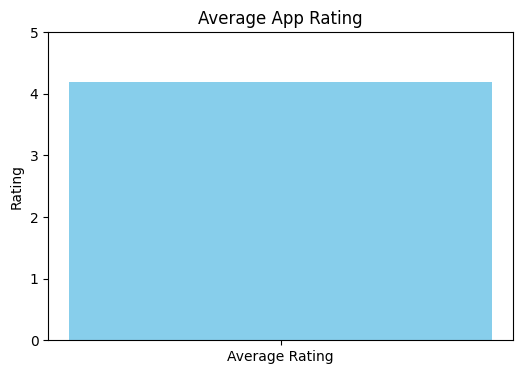

In [65]:
# Calculate the average rating
average_rating = df['Rating'].mean()

# Display the average rating
print(f"The average rating of apps in the dataset is: {average_rating:.2f}")

# Create a visualization for the average rating
plt.figure(figsize=(6, 4))
plt.bar(['Average Rating'], [average_rating], color='skyblue')
plt.ylim(0, 5) # Rating is on a scale of 0 to 5
plt.ylabel('Rating')
plt.title('Average App Rating')
plt.show()

How many unique categories of apps are there?


In [66]:
# Count the number of unique categories
unique_categories_count = df['Category'].nunique()

# Display the number of unique categories
print(f"There are {unique_categories_count} unique categories of apps in the dataset.")

There are 33 unique categories of apps in the dataset.


What is the distribution of app sizes?


In [67]:
def convert_size_to_mb(size):
    if isinstance(size, str):
        if 'M' in size:
            return float(size.replace('M', ''))
        elif 'k' in size:
            return float(size.replace('k', '')) / 1024  # Convert KB to MB
        elif 'Varies with device' in size:
            return np.nan  # Handle 'Varies with device' as NaN for now
    return np.nan

df['Size_MB'] = df['Size'].apply(convert_size_to_mb)

# Fill NaN values in 'Size_MB' with the median of the numerical sizes
df['Size_MB'].fillna(df['Size_MB'].median(), inplace=True)

display(df[['Size', 'Size_MB']].sample(5))
display(df['Size_MB'].dtype)

,Size,Size_MB
9005,2.2M,2.2
1588,39M,39.0
9465,Varies with device,13.0
3548,Varies with device,13.0
8783,41M,41.0


dtype('float64')

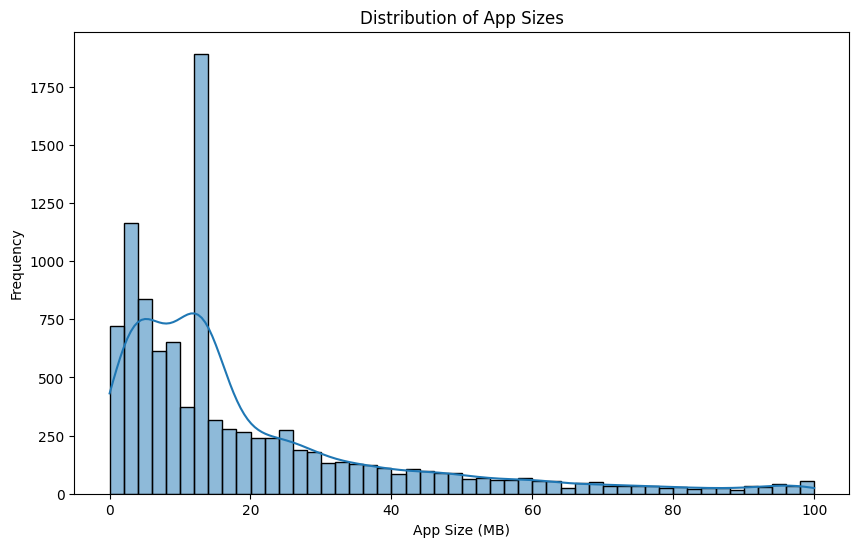

In [68]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Size_MB'], bins=50, kde=True)
plt.xlabel('App Size (MB)')
plt.ylabel('Frequency')
plt.title('Distribution of App Sizes')
plt.show()

How many free vs paid apps are there?


Distribution of App Types:
Type
Free    9584
Paid     762
Name: count, dtype: int64


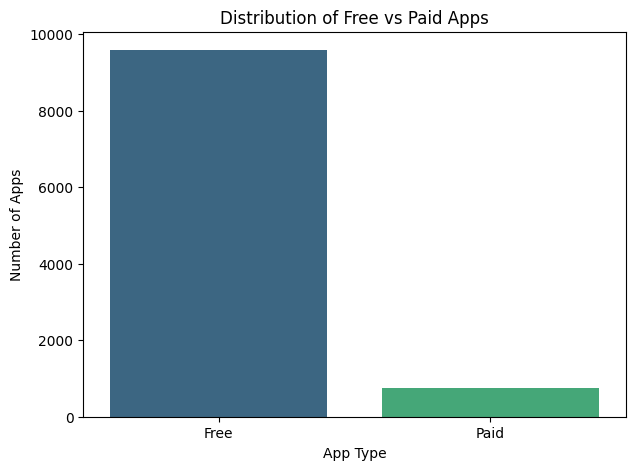

In [69]:
# Count the number of free vs paid apps
app_type_counts = df['Type'].value_counts()

# Display the counts
print("Distribution of App Types:")
print(app_type_counts)

# Create a bar plot to visualize the distribution
plt.figure(figsize=(7, 5))
sns.barplot(x=app_type_counts.index, y=app_type_counts.values, palette='viridis')
plt.xlabel('App Type')
plt.ylabel('Number of Apps')
plt.title('Distribution of Free vs Paid Apps')
plt.show()

What is the most common content rating for apps?


The most common content rating is: Everyone

Distribution of Content Ratings:


,count
Content Rating,
Everyone,8372
Teen,1146
Mature 17+,447
Everyone 10+,376
Adults only 18+,3
Unrated,2


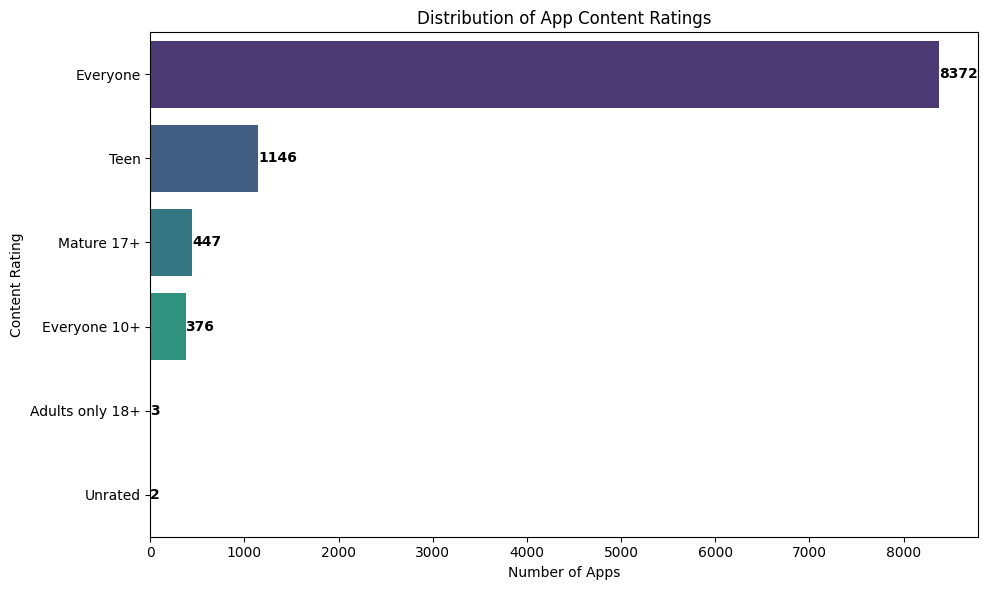

In [70]:
# Get the value counts for 'Content Rating'
content_rating_counts = df['Content Rating'].value_counts()

# Display the most common content rating
most_common_rating = content_rating_counts.index[0]
print(f"The most common content rating is: {most_common_rating}")

# Display the distribution
print("\nDistribution of Content Ratings:")
display(content_rating_counts)

# Create a horizontal bar plot with annotations
plt.figure(figsize=(10, 6))
ax = sns.barplot(x=content_rating_counts.values, y=content_rating_counts.index, palette='viridis', orient='h')

plt.xlabel('Number of Apps')
plt.ylabel('Content Rating')
plt.title('Distribution of App Content Ratings')

# Add annotations to each bar
for i, v in enumerate(content_rating_counts.values):
    ax.text(v + 0.1, i, str(v), ha='left', va='center', fontweight='bold')

plt.tight_layout()
plt.show()

What are the top 5 most installed apps?


Top 5 Most Installed Apps:


,App,Avg_Installs
5395,Google Photos,1000000000
4170,Google Drive,1000000000
3117,Maps - Navigate & Explore,1000000000
4153,Hangouts,1000000000
3234,Google,1000000000


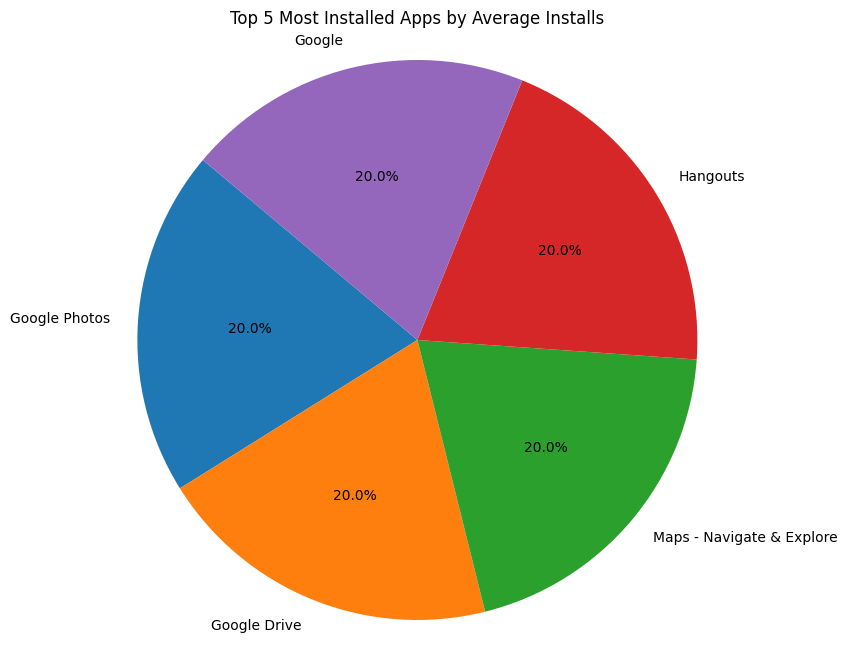

In [71]:
# Sort by 'Avg_Installs' in descending order and get the top 5 apps
top_5_installed_apps = df.sort_values(by='Avg_Installs', ascending=False).head(5)

# Display the top 5 apps
print("Top 5 Most Installed Apps:")
display(top_5_installed_apps[['App', 'Avg_Installs']])

# Create a pie chart
plt.figure(figsize=(10, 8))
plt.pie(top_5_installed_apps['Avg_Installs'], labels=top_5_installed_apps['App'], autopct='%1.1f%%', startangle=140)
plt.title('Top 5 Most Installed Apps by Average Installs')
plt.axis('equal')
plt.show()

How many apps have a rating of 4.0 and above?


In [72]:
# Count the number of apps with a rating of 4.0 and above
apps_high_rating = df[df['Rating'] >= 4.0]
count_high_rating = len(apps_high_rating)

# Display the count
print(f"Number of apps with a rating of 4.0 and above: {count_high_rating}")

Number of apps with a rating of 4.0 and above: 8402


What is the average number of reviews for free vs paid apps?


Average Number of Reviews for Free vs Paid Apps:


,Type,Reviews
0,Free,437690.492487
1,Paid,11946.864829


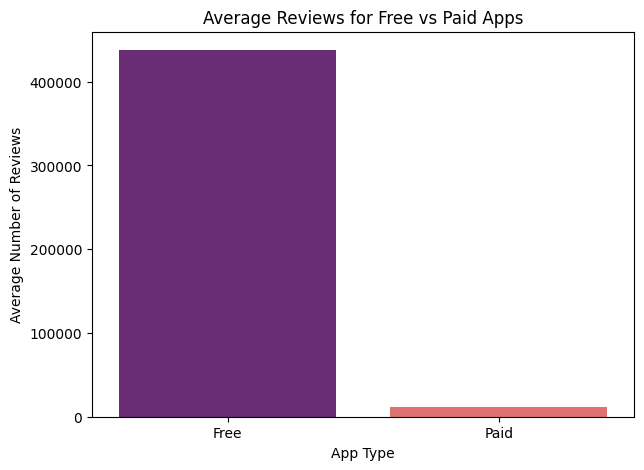

In [73]:
# Calculate the average number of reviews for free vs paid apps
average_reviews_by_type = df.groupby('Type')['Reviews'].mean().reset_index()

# Display the average reviews by type
print("Average Number of Reviews for Free vs Paid Apps:")
display(average_reviews_by_type)

# Create a bar plot to visualize the average reviews by type
plt.figure(figsize=(7, 5))
sns.barplot(x='Type', y='Reviews', data=average_reviews_by_type, palette='magma')
plt.xlabel('App Type')
plt.ylabel('Average Number of Reviews')
plt.title('Average Reviews for Free vs Paid Apps')
plt.show()

What is the average app size for each category?


Average App Size by Category:


,Category,Size_MB
14,GAME,40.767008
11,FAMILY,26.915180
28,SPORTS,22.428985
30,TRAVEL_AND_LOCAL,21.697708
22,PARENTING,21.561667
13,FOOD_AND_DRINK,20.157258
15,HEALTH_AND_FITNESS,19.778682
1,AUTO_AND_VEHICLES,19.208948
20,MEDICAL,18.945006
9,ENTERTAINMENT,18.818018


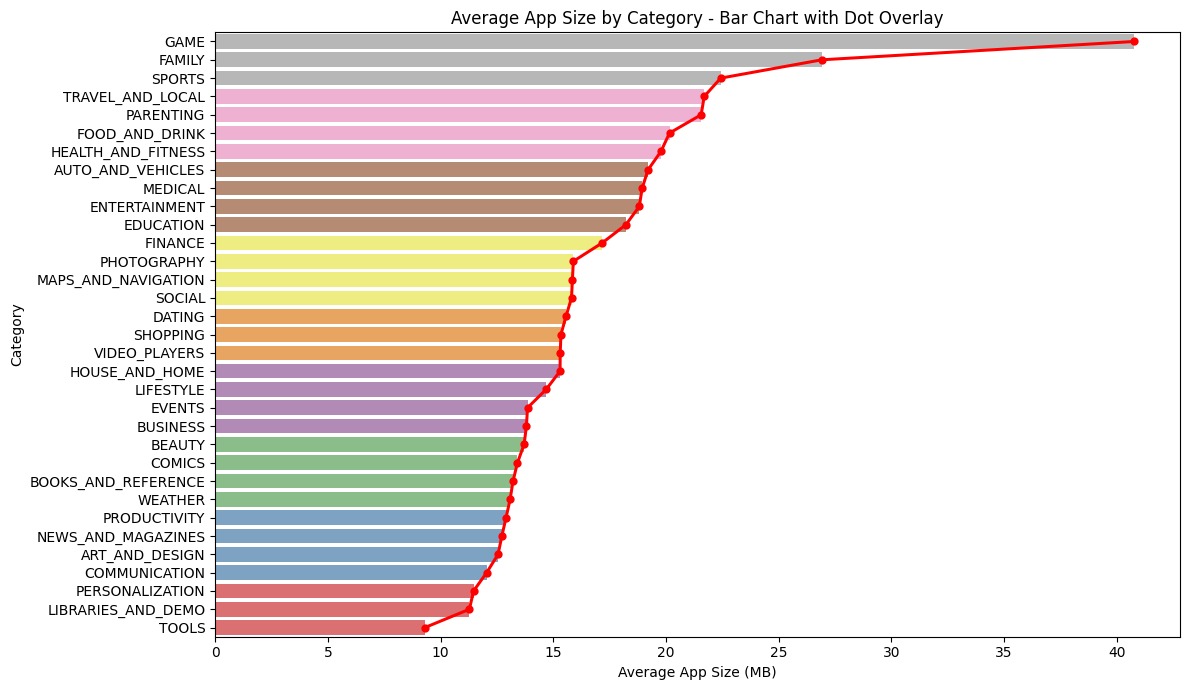

In [74]:
# Calculate the average app size for each category
average_size_by_category = df.groupby('Category')['Size_MB'].mean().reset_index()

# Sort the categories by average size for better visualization
average_size_by_category = average_size_by_category.sort_values(by='Size_MB', ascending=False)

# Display the average size by category
print("Average App Size by Category:")
display(average_size_by_category)

plt.figure(figsize=(12, 7))
# Bar plot
sns.barplot(x='Size_MB', y='Category', data=average_size_by_category, palette='Set1_r', alpha=0.7)
# Point plot overlay
sns.pointplot(x='Size_MB', y='Category', data=average_size_by_category, color='red', markers='o', scale=0.8)
plt.xlabel('Average App Size (MB)')
plt.ylabel('Category')
plt.title('Average App Size by Category - Bar Chart with Dot Overlay')
plt.tight_layout()
plt.show()

How many apps were last updated in 2018?


In [75]:
# Filter for apps updated in 2018
apps_updated_2018 = df[df['Last Updated'].dt.year == 2018]

# Count the number of apps
count_updated_2018 = len(apps_updated_2018)

# Display the count
print(f"Number of apps last updated in 2018: {count_updated_2018}")

Number of apps last updated in 2018: 6929


What is the correlation between the number of installs and the app rating?


The correlation between the number of installs and the app rating is: 0.05


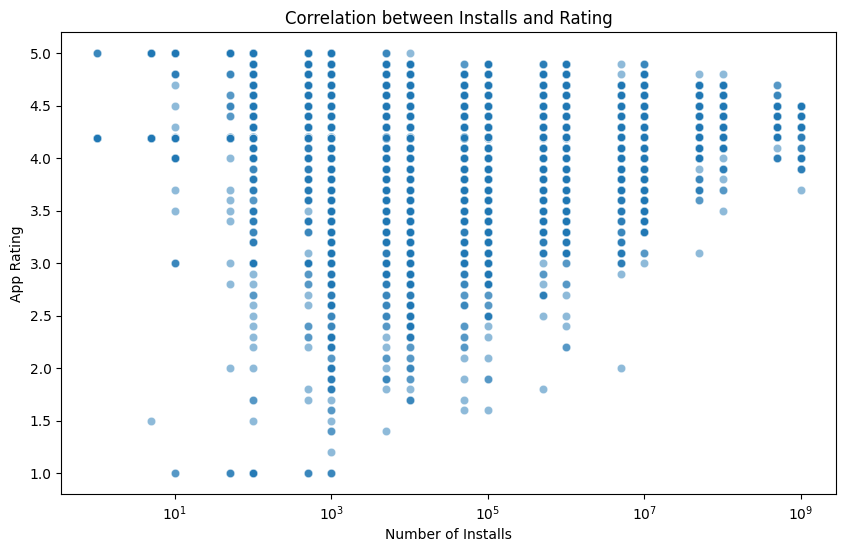

In [76]:
# Calculate the correlation between 'Avg_Installs' and 'Rating'
correlation = df['Avg_Installs'].corr(df['Rating'])

# Display the correlation coefficient
print(f"The correlation between the number of installs and the app rating is: {correlation:.2f}")

# Create a scatter plot to visualize the relationship
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Avg_Installs', y='Rating', data=df, alpha=0.5)
plt.xlabel('Number of Installs')
plt.ylabel('App Rating')
plt.title('Correlation between Installs and Rating')
plt.xscale('log') # Use a log scale for installs due to large range
plt.show()

Which app categories have the highest average rating?


Average App Rating by Category:


,Category,Rating
8,EDUCATION,4.374535
0,ART_AND_DESIGN,4.368260
10,EVENTS,4.362520
3,BOOKS_AND_REFERENCE,4.311599
23,PERSONALIZATION,4.304104
22,PARENTING,4.281590
14,GAME,4.277438
2,BEAUTY,4.260094
15,HEALTH_AND_FITNESS,4.251111
27,SOCIAL,4.246513


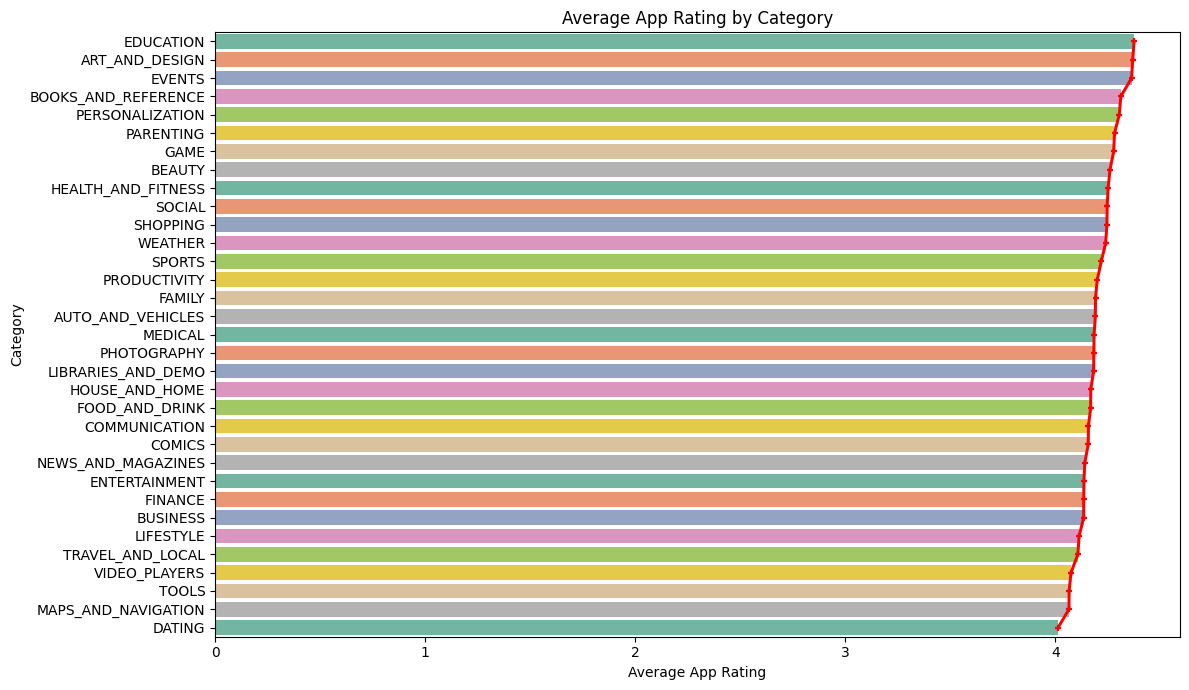

In [77]:
# Calculate the average rating for each category
average_rating_by_category = df.groupby('Category')['Rating'].mean().reset_index()

# Sort the categories by average rating in descending order
average_rating_by_category = average_rating_by_category.sort_values(by='Rating', ascending=False)

# Display the average rating by category
print("Average App Rating by Category:")
display(average_rating_by_category)

# Create a bar plot to visualize the average rating by category
plt.figure(figsize=(12, 7))
sns.barplot(x='Rating', y='Category', data=average_rating_by_category, palette='Set2')
sns.pointplot(x='Rating', y='Category', data=average_rating_by_category, color='red', markers='+', scale=0.8)
plt.xlabel('Average App Rating')
plt.ylabel('Category')
plt.title('Average App Rating by Category')
plt.tight_layout()
plt.show()

How does the price of an app affect its average rating?


The correlation between app price and rating is: -0.02


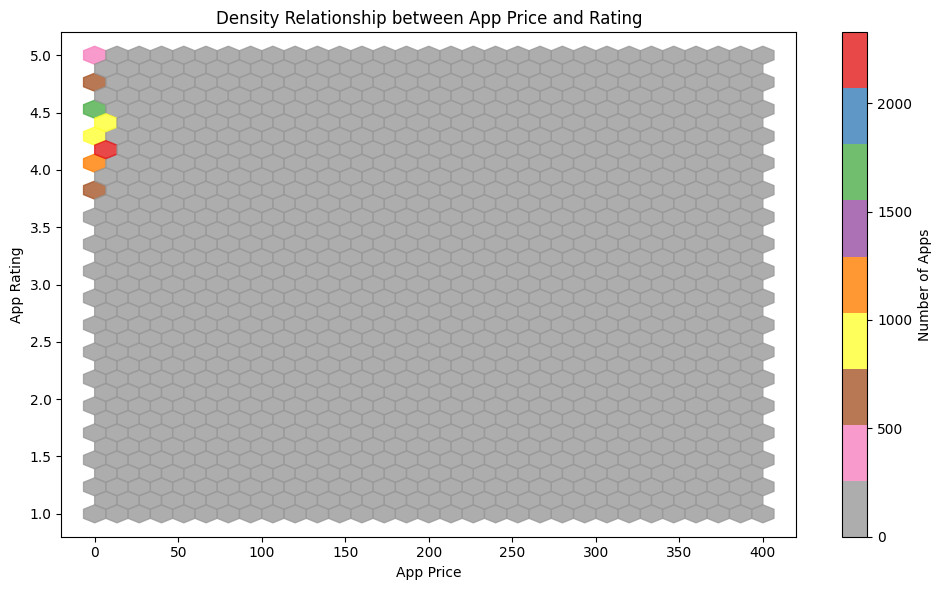

In [78]:
# Calculate the correlation between 'Price' and 'Rating'
correlation_price_rating = df['Price'].corr(df['Rating'])

# Display the correlation coefficient
print(f"The correlation between app price and rating is: {correlation_price_rating:.2f}")

plt.figure(figsize=(10, 6))
plt.hexbin(x=df['Price'], y=df['Rating'], gridsize=30, cmap='Set1_r', alpha=0.8)
plt.colorbar(label='Number of Apps')
plt.xlabel('App Price')
plt.ylabel('App Rating')
plt.title('Density Relationship between App Price and Rating')
plt.tight_layout()
plt.show()

What is the distribution of app ratings across different content ratings?


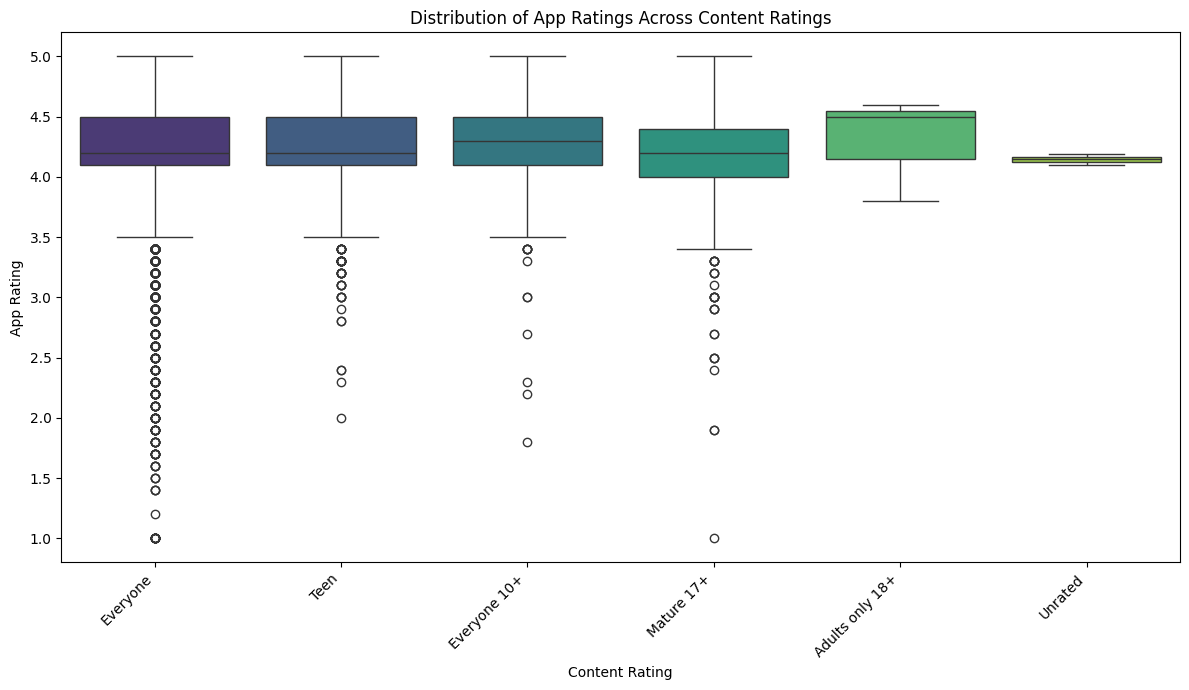

In [79]:
plt.figure(figsize=(12, 7))
sns.boxplot(x='Content Rating', y='Rating', data=df, palette='viridis')
plt.xlabel('Content Rating')
plt.ylabel('App Rating')
plt.title('Distribution of App Ratings Across Content Ratings')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

Which genres have the most apps with over 1 million installs?


Top Genres with Over 1 Million Installs:


,count
Category,
GAME,714
FAMILY,631
TOOLS,289
PHOTOGRAPHY,213
COMMUNICATION,191
PRODUCTIVITY,180
SPORTS,143
SOCIAL,141
HEALTH_AND_FITNESS,130


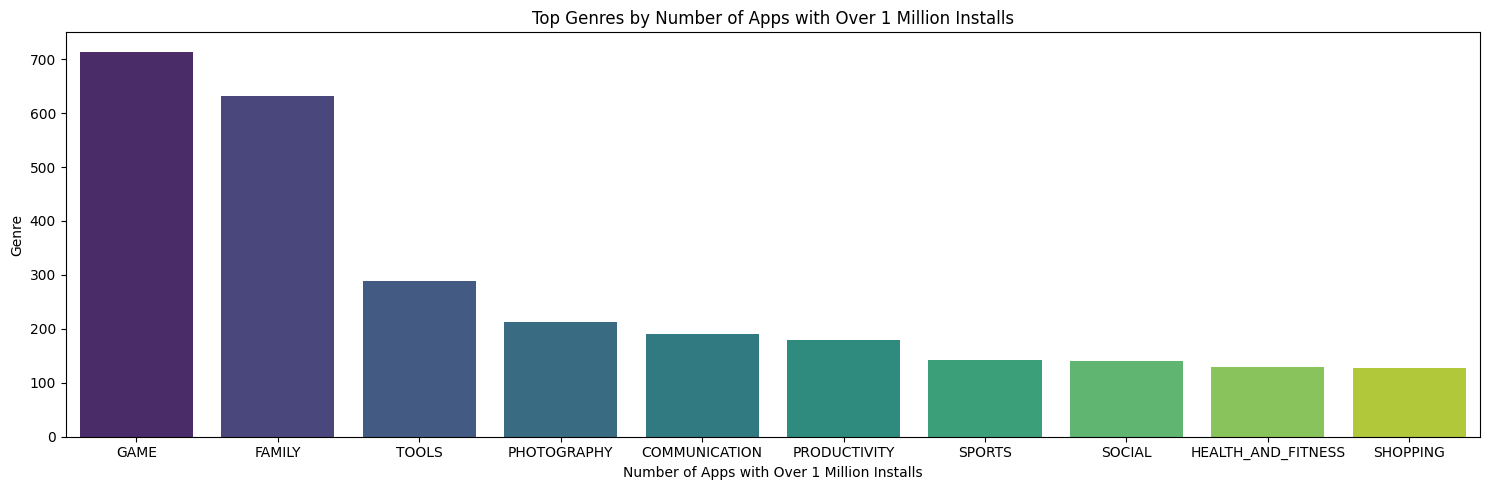

In [80]:
# Filter for apps with over 1 million installs
apps_over_1m_installs = df[df['Avg_Installs'] >= 1000000]

# Count the occurrences of each genre in this filtered data
genre_counts_over_1m = apps_over_1m_installs['Category'].value_counts().head(10) # Limiting to top 10 for clarity

# Display the top genres with over 1 million installs
print("Top Genres with Over 1 Million Installs:")
display(genre_counts_over_1m)

# Create a bar plot to visualize the top genres
plt.figure(figsize=(15, 5))
sns.barplot(y=genre_counts_over_1m.values, x=genre_counts_over_1m.index, palette='viridis')
plt.xlabel('Number of Apps with Over 1 Million Installs')
plt.ylabel('Genre')
plt.title('Top Genres by Number of Apps with Over 1 Million Installs')
plt.tight_layout()
plt.show()

How frequently do apps get updated?


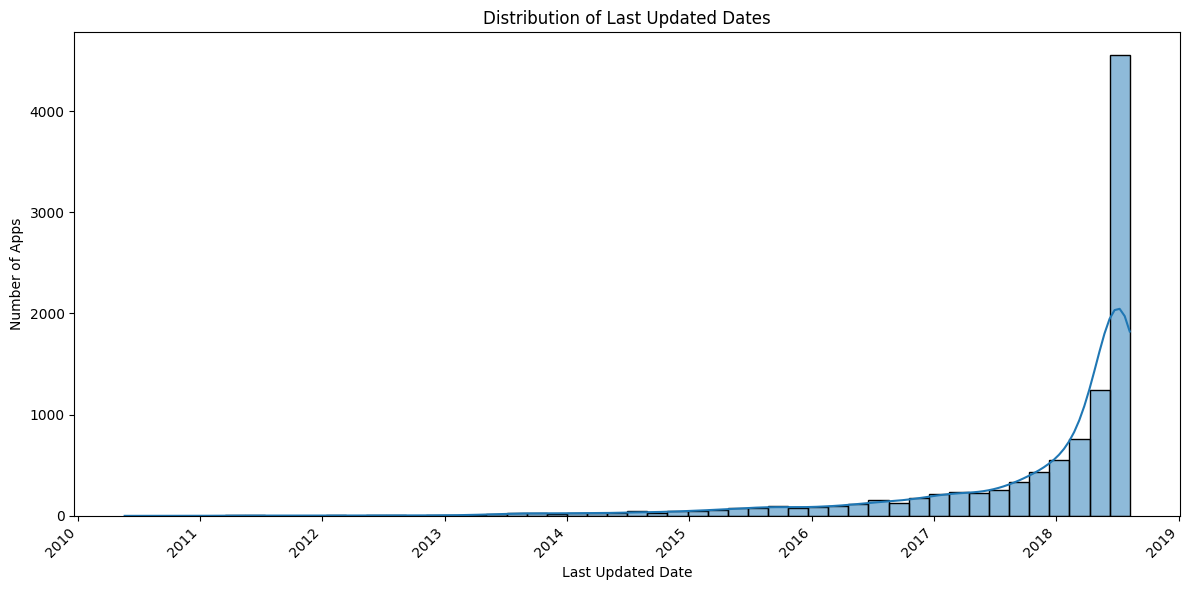

In [81]:

plt.figure(figsize=(12, 6))
sns.histplot(df['Last Updated'], bins=50, kde=True)
plt.xlabel('Last Updated Date')
plt.ylabel('Number of Apps')
plt.title('Distribution of Last Updated Dates')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

What is the impact of app size on the number of installs?


The correlation between app size and the number of installs is: 0.05


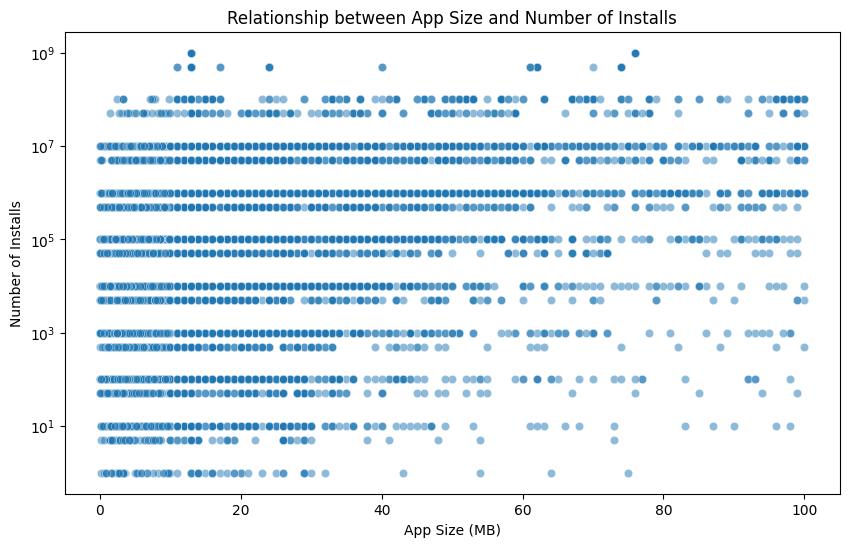

In [82]:
# Calculate the correlation between 'Size_MB' and 'Avg_Installs'
correlation_size_installs = df['Size_MB'].corr(df['Avg_Installs'])

# Display the correlation coefficient
print(f"The correlation between app size and the number of installs is: {correlation_size_installs:.2f}")

# Create a scatter plot to visualize the relationship between size and installs
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Size_MB', y='Avg_Installs', data=df, alpha=0.5)
plt.xlabel('App Size (MB)')
plt.ylabel('Number of Installs')
plt.title('Relationship between App Size and Number of Installs')
plt.yscale('log')
plt.show()

Which apps have the highest number of reviews, and what are their ratings?


Top 10 Most Reviewed Apps and Their Ratings:


,App,Reviews,Rating
2544,Facebook,78158306,4.1
336,WhatsApp Messenger,69119316,4.4
2545,Instagram,66577313,4.5
335,Messenger – Text and Video Chat for Free,56642847,4.0
1670,Clash of Clans,44891723,4.6
4005,Clean Master- Space Cleaner & Antivirus,42916526,4.7
1654,Subway Surfers,27722264,4.5
3665,YouTube,25655305,4.3
7536,"Security Master - Antivirus, VPN, AppLock, Boo...",24900999,4.7
1660,Clash Royale,23133508,4.6


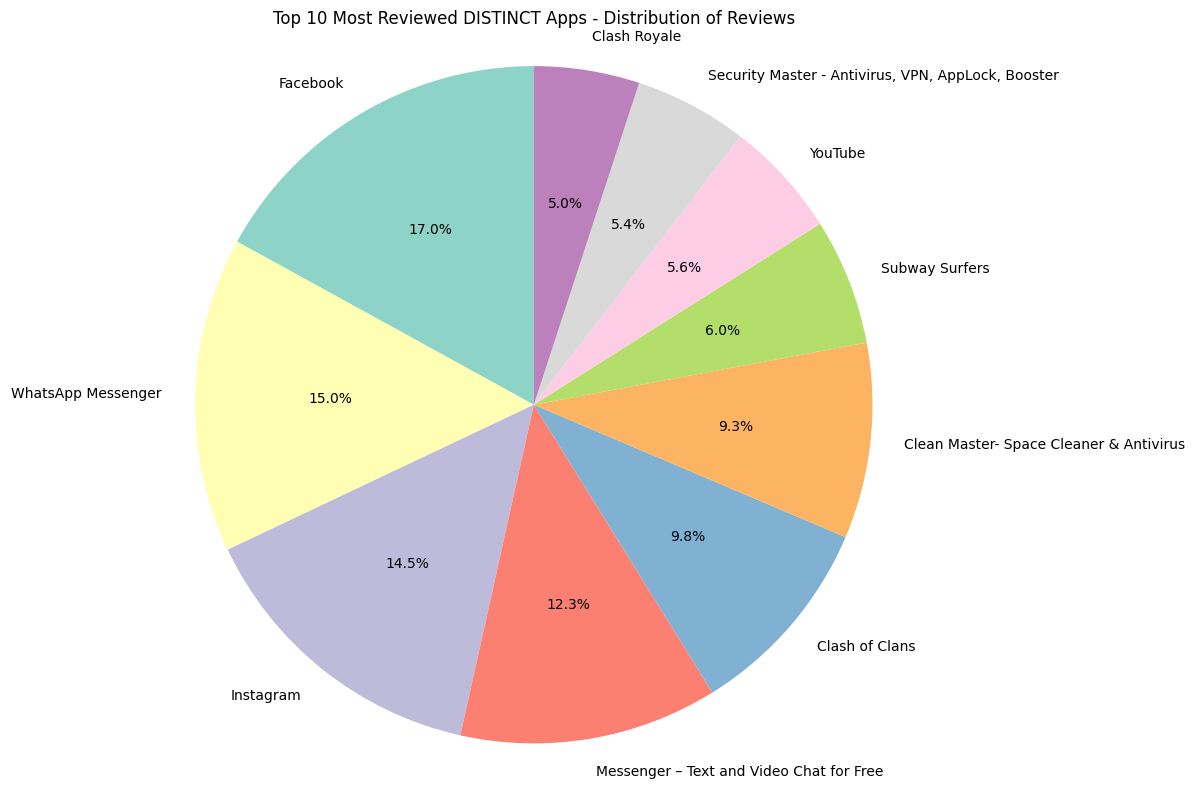

In [83]:
# Remove duplicate apps first, then sort by reviews
distinct_apps = df.drop_duplicates(subset='App', keep='first')  # Keep first occurrence of each app
top_reviewed_apps = distinct_apps.sort_values(by='Reviews', ascending=False).head(10)

# Display the top reviewed apps and their ratings
print("Top 10 Most Reviewed Apps and Their Ratings:")
display(top_reviewed_apps[['App', 'Reviews', 'Rating']])

# Create a pie chart to visualize the number of reviews for the top apps
plt.figure(figsize=(12, 8))
plt.pie(top_reviewed_apps['Reviews'], labels=top_reviewed_apps['App'], autopct='%1.1f%%',
        startangle=90, colors=sns.color_palette('Set3', len(top_reviewed_apps)))
plt.title('Top 10 Most Reviewed DISTINCT Apps - Distribution of Reviews')
plt.axis('equal')
plt.tight_layout()
plt.show()

How does the content rating distribution differ between free and paid apps?


Content Rating Distribution by App Type (Counts):


Content Rating,Adults only 18+,Everyone,Everyone 10+,Mature 17+,Teen,Unrated
Type,,,,,,
Free,3,7713,344,428,1094,2
Paid,0,659,32,19,52,0



Content Rating Distribution by App Type (Proportions):


Content Rating,Adults only 18+,Everyone,Everyone 10+,Mature 17+,Teen,Unrated
Type,,,,,,
Free,0.000313,0.804779,0.035893,0.044658,0.114149,0.000209
Paid,0.000000,0.864829,0.041995,0.024934,0.068241,0.000000


<Figure size 1000x700 with 0 Axes>

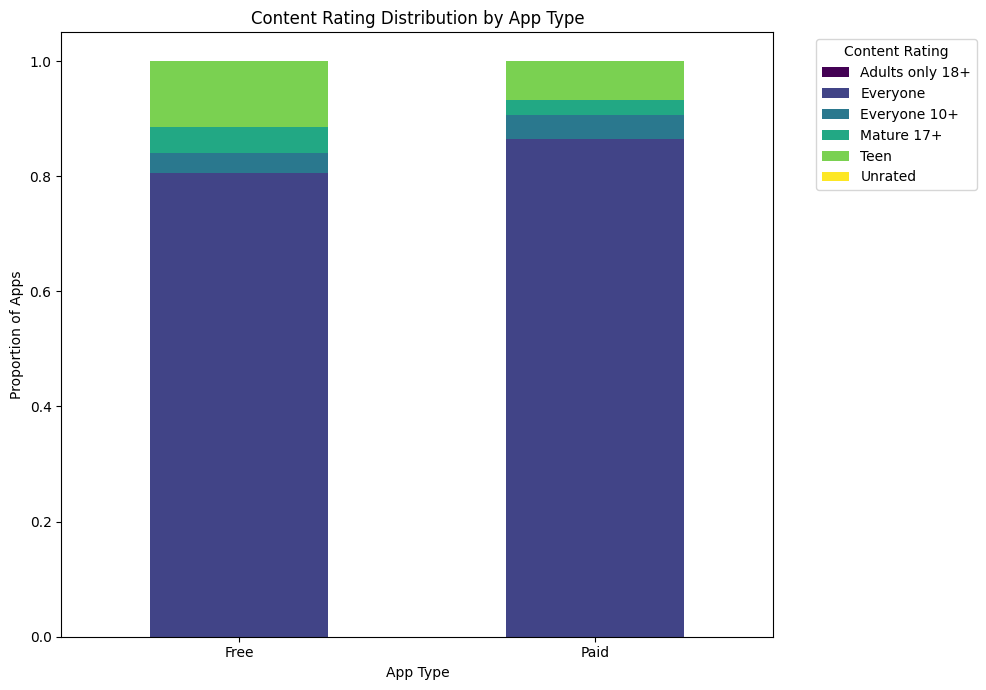

In [84]:
# Group by Type and Content Rating and count the occurrences
content_rating_by_type = df.groupby(['Type', 'Content Rating']).size().unstack(fill_value=0)

# Calculate proportions within each type for better comparison
content_rating_by_type_prop = content_rating_by_type.apply(lambda x: x / x.sum(), axis=1)

# Display the distribution counts and proportions
print("Content Rating Distribution by App Type (Counts):")
display(content_rating_by_type)

print("\nContent Rating Distribution by App Type (Proportions):")
display(content_rating_by_type_prop)


# Visualize the distribution using a stacked bar chart of proportions
plt.figure(figsize=(10, 7))
content_rating_by_type_prop.plot(kind='bar', stacked=True, figsize=(10, 7), colormap='viridis')
plt.xlabel('App Type')
plt.ylabel('Proportion of Apps')
plt.title('Content Rating Distribution by App Type')
plt.xticks(rotation=0)
plt.legend(title='Content Rating', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

What are the top 5 categories with the most installs?


Top 5 Categories with the Most Installs:


,Category,Avg_Installs
14,GAME,31544024415
6,COMMUNICATION,24152276251
27,SOCIAL,12513867902
25,PRODUCTIVITY,12463091369
29,TOOLS,11452271905


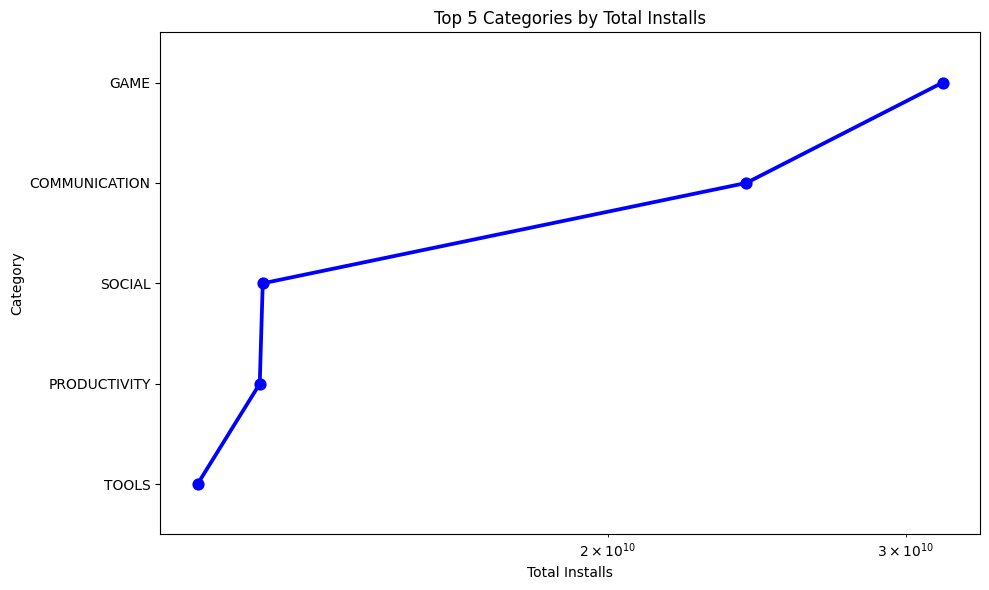

In [85]:
# Group by Category and sum the average installs
category_installs = df.groupby('Category')['Avg_Installs'].sum().reset_index()

# Sort by total installs in descending order and get the top 5
top_5_categories_by_installs = category_installs.sort_values(by='Avg_Installs', ascending=False).head(5)

# Display the top 5 categories by installs
print("Top 5 Categories with the Most Installs:")
display(top_5_categories_by_installs)

# Visualize the top 5 categories by installs using a point plot
plt.figure(figsize=(10, 6))
sns.pointplot(x='Avg_Installs', y='Category', data=top_5_categories_by_installs, color='blue', markers='o', linestyles='-')
plt.xlabel('Total Installs')
plt.ylabel('Category')
plt.title('Top 5 Categories by Total Installs')
plt.xscale('log') # Use log scale for installs due to large values
plt.tight_layout()
plt.show()

What are the top 10 apps with the highest ratings, and how do their number of reviews and installs compare?


Top 10 Apps with the Highest Ratings and their Reviews and Installs:


,App,Rating,Reviews,Avg_Installs
10837,Fr. Mike Schmitz Audio Teachings,5.0,4,100
10820,Fr. Daoud Lamei,5.0,22,1000
9806,Dr. ES PV Calculator,5.0,19,500
9766,ER Assist,5.0,3,10
9911,daskal.eu,5.0,5,50
654,Speeding Joyride & Car Meet App,5.0,3,100
6146,ReactNative BG Geolocation,5.0,5,1000
7731,CQ ESPM,5.0,2,5
7754,CricQuick,5.0,17,50
7756,iReadMe,5.0,8,100


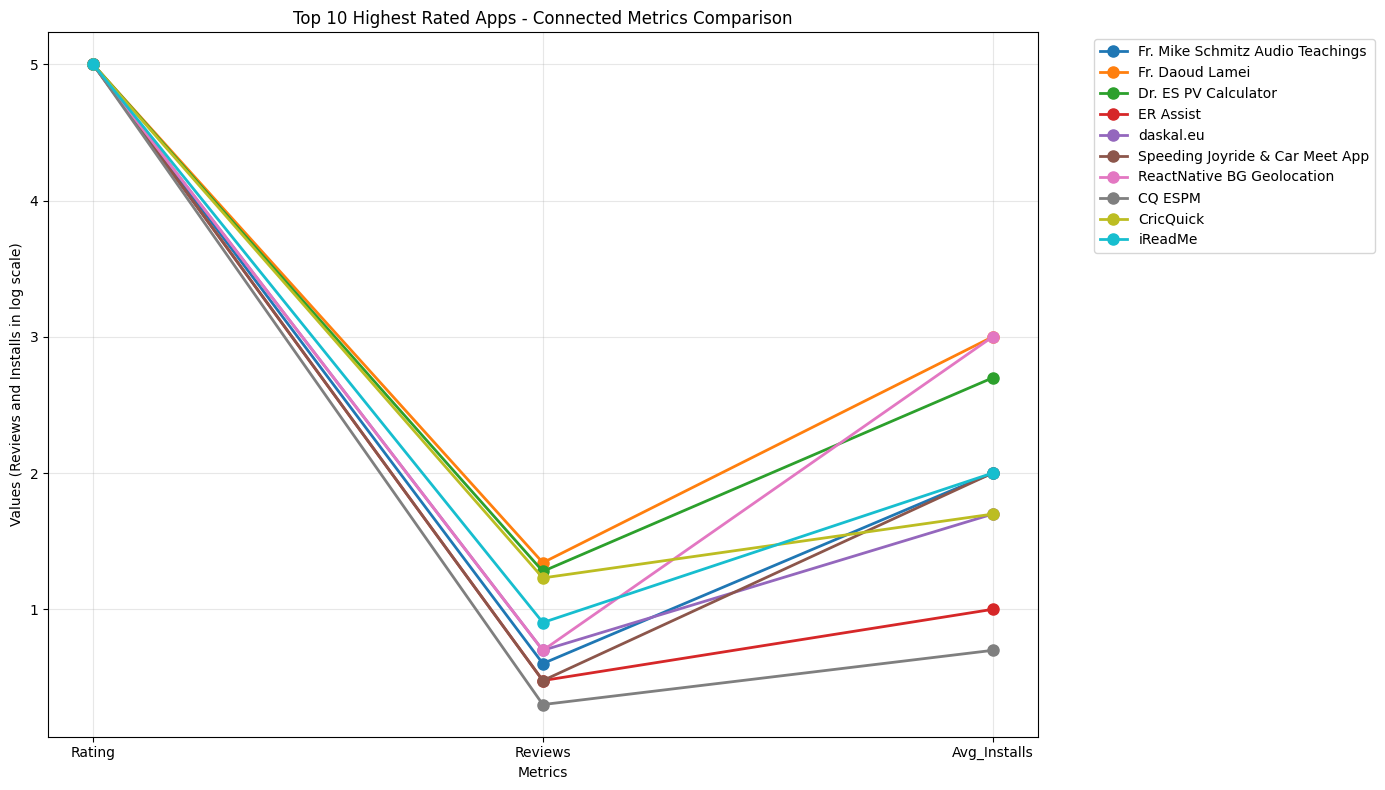

In [86]:
# Sort by 'Rating' in descending order and get the top 10 apps
top_rated_apps = df.sort_values(by='Rating', ascending=False).head(10)

# Display the top 10 apps with their ratings, reviews, and installs
print("Top 10 Apps with the Highest Ratings and their Reviews and Installs:")
display(top_rated_apps[['App', 'Rating', 'Reviews', 'Avg_Installs']])

# Get the top 10 apps with the highest ratings
plt.figure(figsize=(14, 8))

# Plot lines connecting the three metrics for each app
for i, app in enumerate(top_rated_apps['App']):
    metrics = ['Rating', 'Reviews', 'Avg_Installs']
    values = [top_rated_apps['Rating'].iloc[i],
              np.log10(top_rated_apps['Reviews'].iloc[i]),
              np.log10(top_rated_apps['Avg_Installs'].iloc[i])]

    plt.plot(metrics, values, marker='o', linewidth=2, label=app, markersize=8)

plt.xlabel('Metrics')
plt.ylabel('Values (Reviews and Installs in log scale)')
plt.title('Top 10 Highest Rated Apps - Connected Metrics Comparison')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

Analyze the trend of app updates over time. Are there any noticeable patterns or seasonal trends?


The correlation between the number of reviews and the number of installs is: 0.63


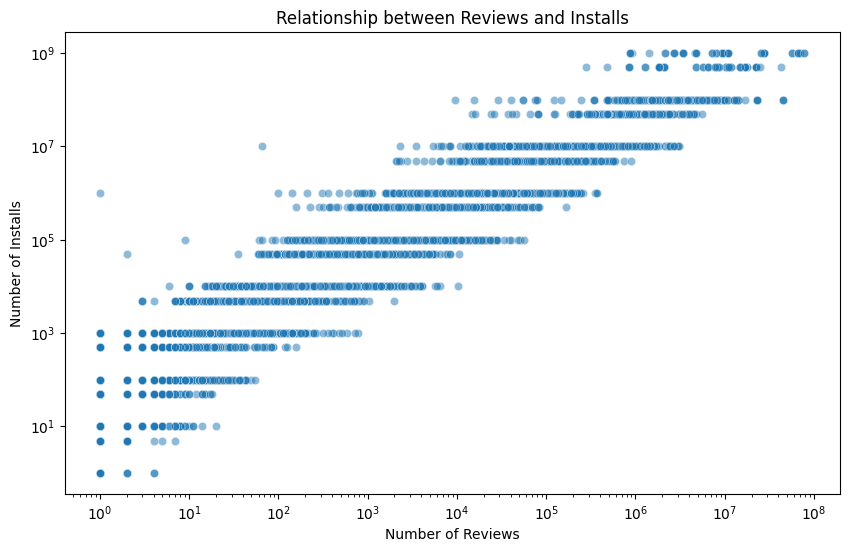

In [87]:
# Calculate the correlation between Reviews and Avg_Installs
correlation_reviews_installs = df['Reviews'].corr(df['Avg_Installs'])

# Display the correlation coefficient
print(f"The correlation between the number of reviews and the number of installs is: {correlation_reviews_installs:.2f}")

# Create a scatter plot to visualize the relationship between reviews and installs
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Reviews', y='Avg_Installs', data=df, alpha=0.5)
plt.xlabel('Number of Reviews')
plt.ylabel('Number of Installs')
plt.title('Relationship between Reviews and Installs')
plt.xscale('log') # Use log scale for reviews due to large range
plt.yscale('log') # Use log scale for installs due to large range
plt.show()

How does the average rating of apps change with the number of installs? Create a binned analysis.


Average App Rating by Install Bin:


,Install_Range,Rating
0,0-100,4.259338
1,"500-1,000",4.115422
2,"5,000-5,000",4.037073
3,"10,000-10,000",4.041950
4,"50,000-100,000",4.096489
5,"500,000-500,000",4.173236
6,"1,000,000-1,000,000",4.218816
7,"5,000,000-5,000,000",4.239385
8,"10,000,000-10,000,000",4.313604
9,"50,000,000-1,000,000,000",4.372170


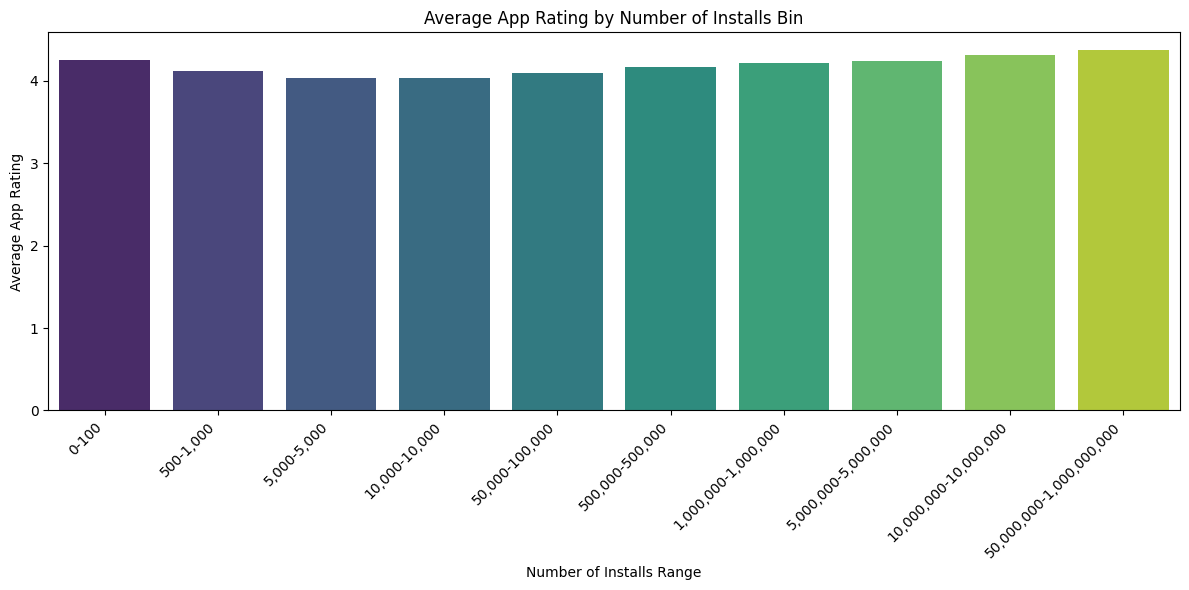

In [88]:
# Create bins for 'Avg_Installs'
df['Install_Bins'] = pd.qcut(df['Avg_Installs'], q=10, labels=False, duplicates='drop')

# Calculate the average rating for each install bin
average_rating_by_installs = df.groupby('Install_Bins')['Rating'].mean().reset_index()

# Map the bin labels to the actual install ranges for better interpretation
bin_edges = df.groupby('Install_Bins')['Avg_Installs'].agg(['min', 'max']).reset_index()
average_rating_by_installs['Install_Range'] = bin_edges.apply(lambda row: f"{row['min']:,}-{row['max']:,}", axis=1)


# Display the average rating by install bin
print("Average App Rating by Install Bin:")
display(average_rating_by_installs[['Install_Range', 'Rating']])

# Create a bar plot to visualize the average rating by install bin
plt.figure(figsize=(12, 6))
sns.barplot(x='Install_Range', y='Rating', data=average_rating_by_installs, palette='viridis')
plt.xlabel('Number of Installs Range')
plt.ylabel('Average App Rating')
plt.title('Average App Rating by Number of Installs Bin')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

What is the relationship between app genre and user ratings? Are certain genres consistently rated higher or lower?


Average App Rating by Category:


,Category,Rating
8,EDUCATION,4.374535
0,ART_AND_DESIGN,4.368260
10,EVENTS,4.362520
3,BOOKS_AND_REFERENCE,4.311599
23,PERSONALIZATION,4.304104
22,PARENTING,4.281590
14,GAME,4.277438
2,BEAUTY,4.260094
15,HEALTH_AND_FITNESS,4.251111
27,SOCIAL,4.246513


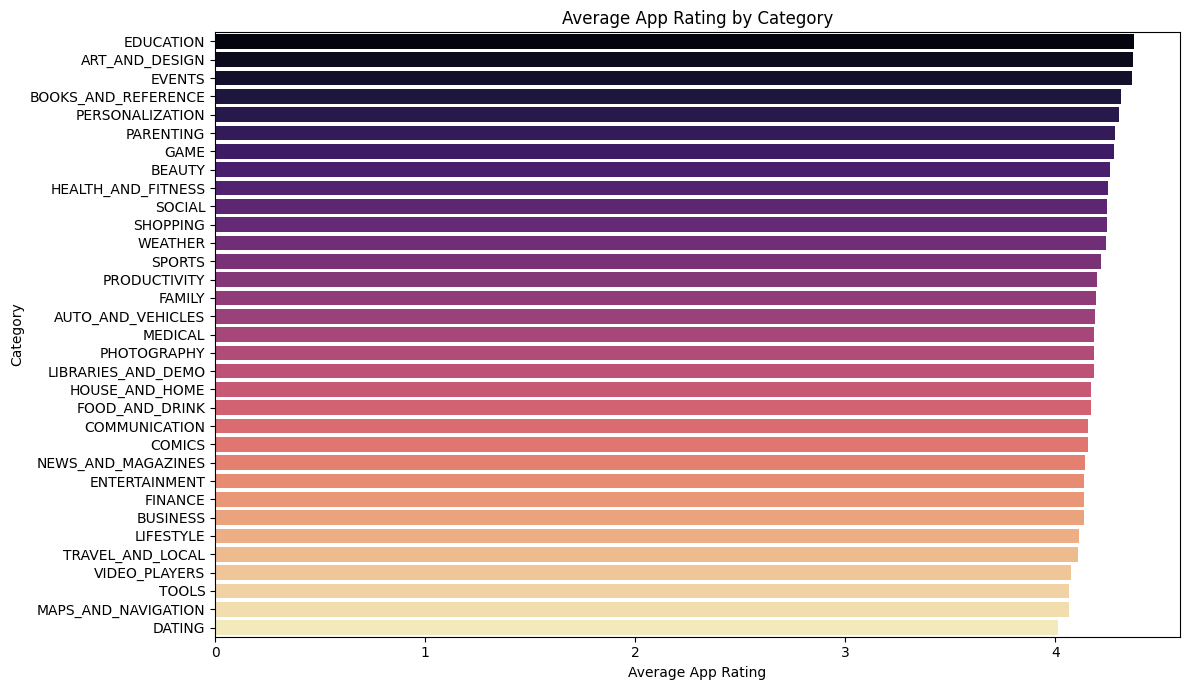

In [89]:
# Calculate the average rating for each category
average_rating_by_category = df.groupby('Category')['Rating'].mean().reset_index()

# Sort the categories by average rating in descending order
average_rating_by_category = average_rating_by_category.sort_values(by='Rating', ascending=False)

# Display the average rating by category
print("Average App Rating by Category:")
display(average_rating_by_category)

# Create a bar plot to visualize the average rating by category
plt.figure(figsize=(12, 7))
sns.barplot(x='Rating', y='Category', data=average_rating_by_category, palette='magma')
plt.xlabel('Average App Rating')
plt.ylabel('Category')
plt.title('Average App Rating by Category')
plt.tight_layout()
plt.show()

**OUTLIER ANALYSIS**

Outlier Detection


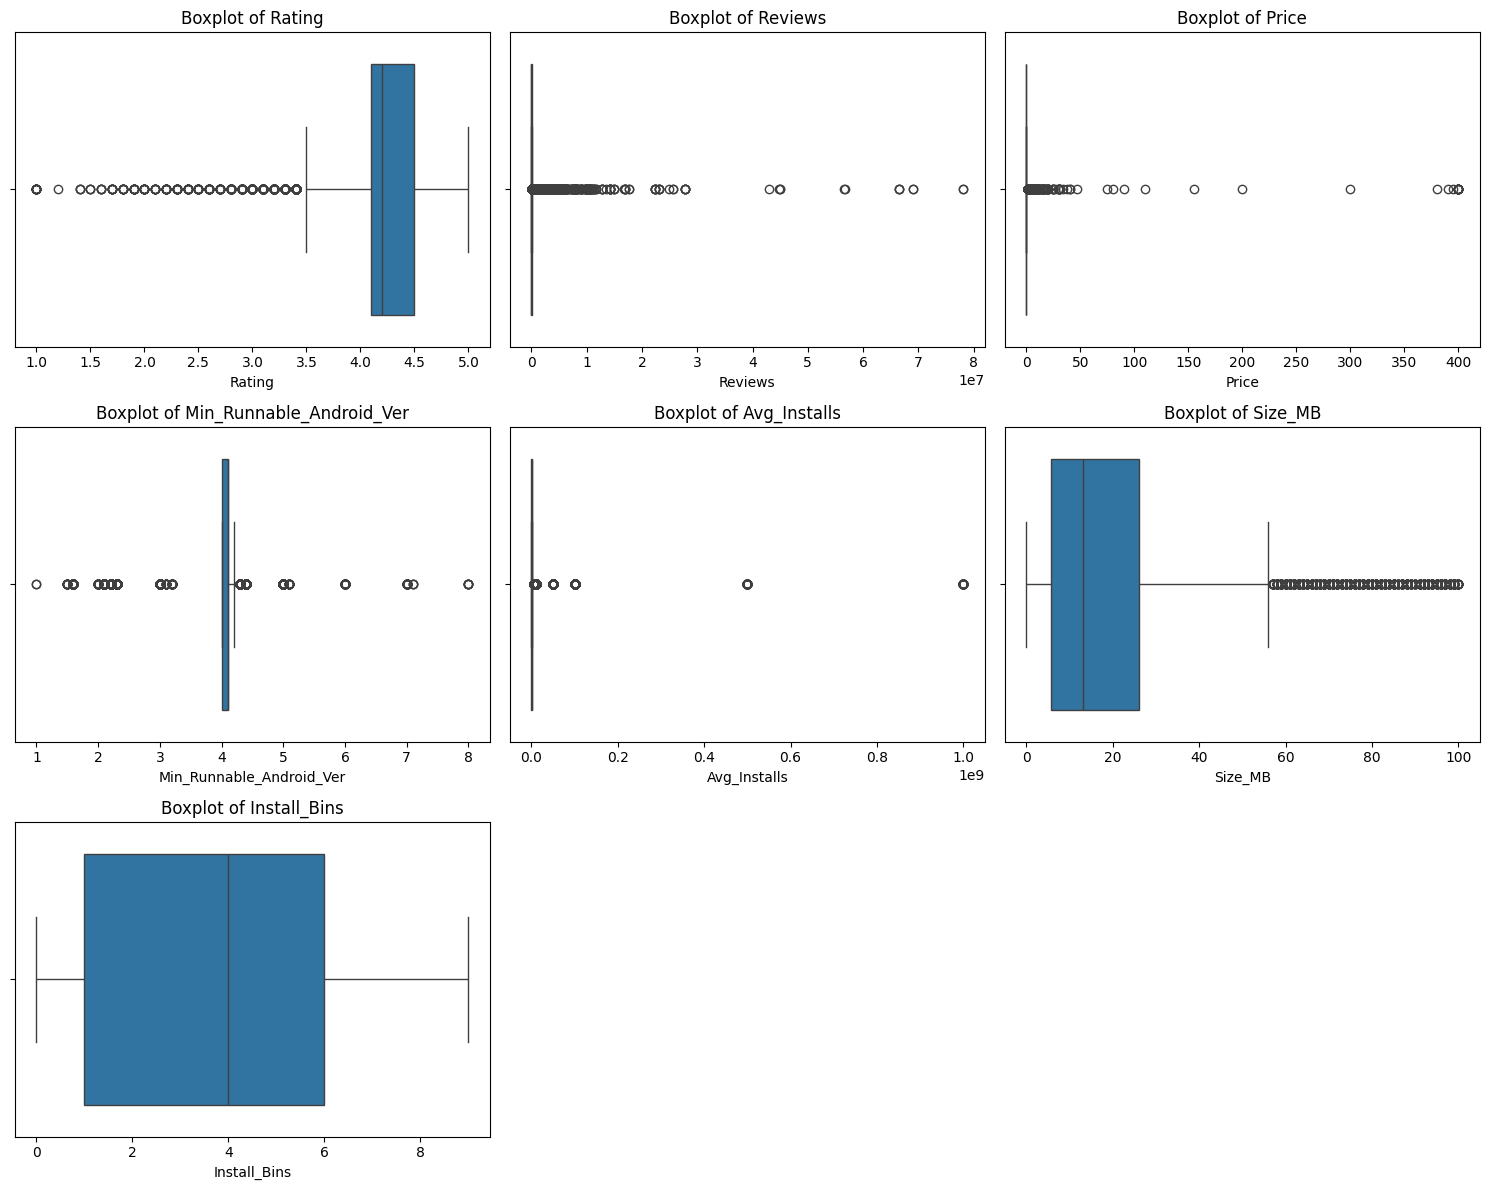

In [90]:
# all numerical columns
numerical_cols = [col for col in df.columns if df[col].dtype in ['int64', 'float64']]
cols_per_row = 3
rows_needed = (len(numerical_cols) + cols_per_row - 1) // cols_per_row

# Subplot
fig, axes = plt.subplots(nrows=rows_needed, ncols=cols_per_row, figsize=(15, rows_needed * 4))
axes = axes.flatten()

# boxplot for each column
for i, col in enumerate(numerical_cols):
    sns.boxplot(x=df[col], ax=axes[i])
    axes[i].set_title(f'Boxplot of {col}')
    axes[i].grid(False)

# hiding extra axes if less charts present
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

Outlier Handling


In [91]:
# only numerical data
numerical_cols = [col for col in df.columns if df[col].dtype in ['int64', 'float64']]

# capping of each column
for col in numerical_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_limit = Q1 - 1.5 * IQR
    upper_limit = Q3 + 1.5 * IQR

    # Winsorization: clip values to lower/upper limit
    df[col] = np.where(df[col] < lower_limit, lower_limit, df[col])
    df[col] = np.where(df[col] > upper_limit, upper_limit, df[col])

print("Outliers handled with Winsorization using IQR:")
print(df.head())

Outliers handled with Winsorization using IQR:
                                                 App        Category  Rating  \
0     Photo Editor & Candy Camera & Grid & ScrapBook  ART_AND_DESIGN     4.1   
1                                Coloring book moana  ART_AND_DESIGN     3.9   
2  U Launcher Lite – FREE Live Cool Themes, Hide ...  ART_AND_DESIGN     4.7   
3                              Sketch - Draw & Paint  ART_AND_DESIGN     4.5   
4              Pixel Draw - Number Art Coloring Book  ART_AND_DESIGN     4.3   

      Reviews  Size     Installs  Type  Price Content Rating Last Updated  \
0     159.000   19M      10,000+  Free    0.0       Everyone   2018-01-07   
1     967.000   14M     500,000+  Free    0.0       Everyone   2018-01-15   
2   87510.000  8.7M   5,000,000+  Free    0.0       Everyone   2018-08-01   
3  116447.625   25M  50,000,000+  Free    0.0           Teen   2018-06-08   
4     967.000  2.8M     100,000+  Free    0.0       Everyone   2018-06-20   

         

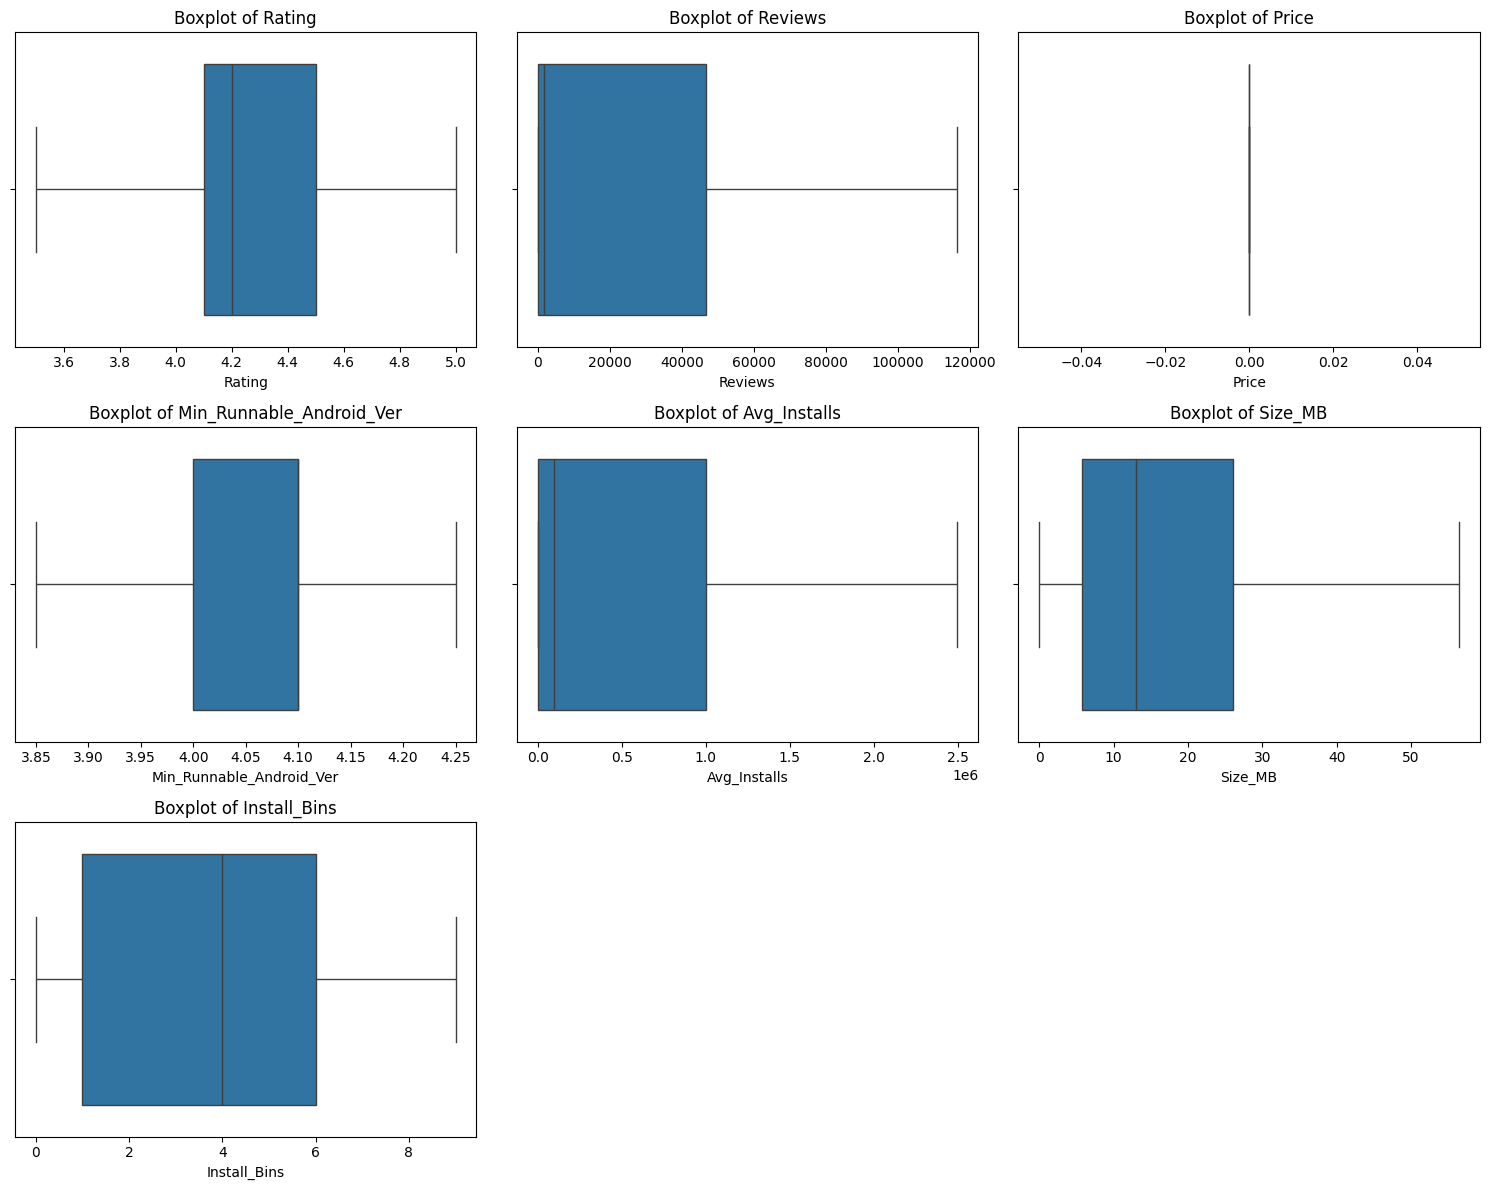

In [92]:
# all numerical columns
numerical_cols = [col for col in df.columns if df[col].dtype in ['int64', 'float64']]
cols_per_row = 3
rows_needed = (len(numerical_cols) + cols_per_row - 1) // cols_per_row

# Subplot
fig, axes = plt.subplots(nrows=rows_needed, ncols=cols_per_row, figsize=(15, rows_needed * 4))
axes = axes.flatten()

# boxplot for each column
for i, col in enumerate(numerical_cols):
    sns.boxplot(x=df[col], ax=axes[i])
    axes[i].set_title(f'Boxplot of {col}')
    axes[i].grid(False)

# hiding extra axes if less charts present
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()